In [1]:
import numpy as np
import skimage
from skimage.exposure import histogram, cumulative_distribution, equalize_hist
from skimage.io import imread
import matplotlib.pyplot as plt

Vamos a comenzar cargando una imagen proveniente de `skimage.data` en escala de grises

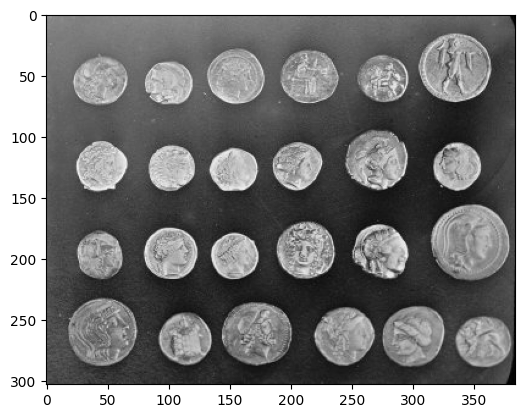

In [2]:
im = skimage.data.coins()
plt.imshow(im, cmap='gray')

... podemos calcular el histograma y mostrarlo usando la función `skimage.exposure.histogram`

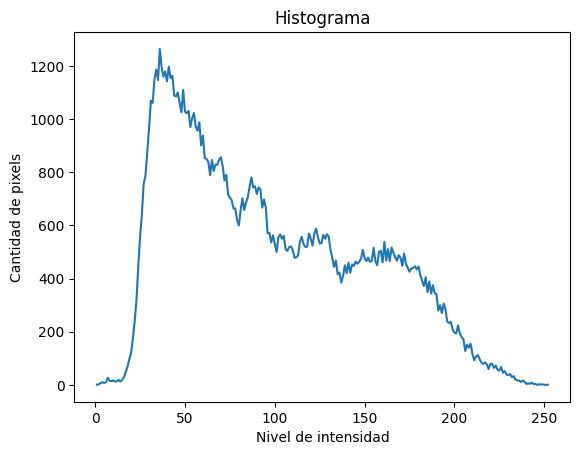

In [3]:
plt.figure()
plt.title("Histograma")
plt.xlabel("Nivel de intensidad")
plt.ylabel("Cantidad de pixels")
hist, bins = histogram(im)
plt.plot(bins, hist)
plt.show()

Igualmente, podemos calcular el histograma normalizado, pasando el parámetro `normalize=True`

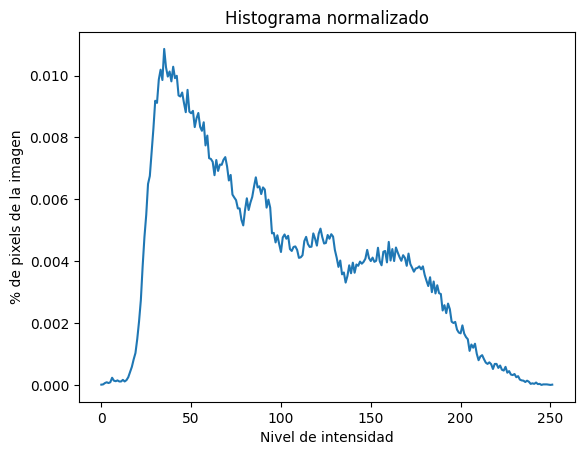

In [4]:
plt.figure()
plt.title("Histograma normalizado")
plt.xlabel("Nivel de intensidad")
plt.ylabel("% de pixels de la imagen")
plt.plot(histogram(im, normalize=True)[0])
plt.show()

A continuación, podemos observar que el parámetro ´n_bins=10´ no surte ningún efecto. Referirse a la documentación de está función para entender mejor el fenómeno. Ver más en [skimage.exposure.histogram](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.histogram)

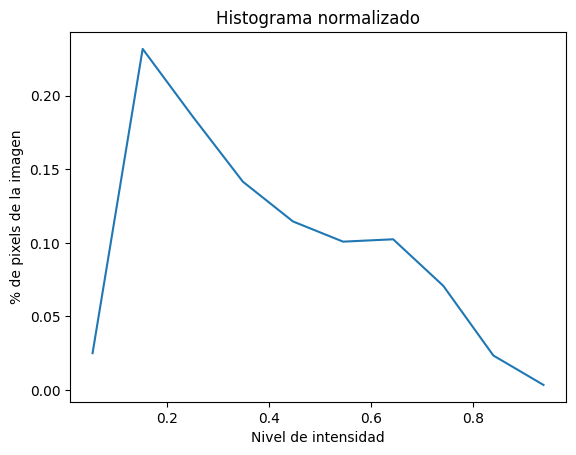

In [5]:

plt.title("Histograma normalizado")
plt.xlabel("Nivel de intensidad")
plt.ylabel("% de pixels de la imagen")
hist, bins  = skimage.exposure.histogram(im/255., nbins=10 , normalize=True)
plt.plot(bins, hist)
plt.show()


A continuación, veamos el efecto de cambiar la cantidad de bins del histograma

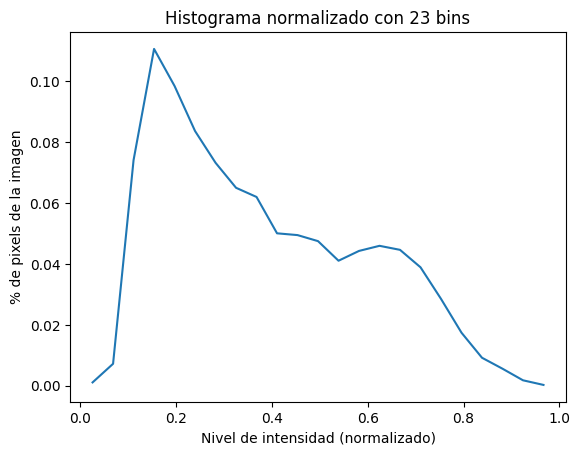

In [6]:
#@title El efecto de la cantidad de bins { run: "auto" }
n_bins = 23 #@param {type:"slider", min:1, max:256, step:1}

plt.figure()
plt.title("Histograma normalizado con {} bins".format(n_bins))
plt.xlabel("Nivel de intensidad (normalizado)")
plt.ylabel("% de pixels de la imagen")
hist, bins  = skimage.exposure.histogram(im/255., nbins=n_bins , normalize=True)
plt.plot(bins, hist)
plt.show()

### Histograma a colores

A continuación, veamos cómo calcular el histograma de una imagen a color. Comencemos cargando la imagen **astronaut** de `skimage.data`.

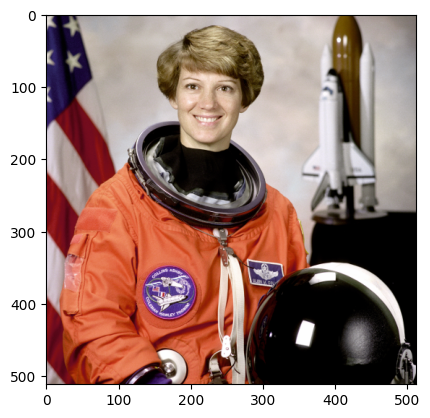

In [7]:
im = skimage.data.astronaut()
plt.imshow(im)

Para calcular el histograma, llamamos a la función `skimage.exposure.histogram` 3 veces, una para cada canal de la imagen **RGB**.

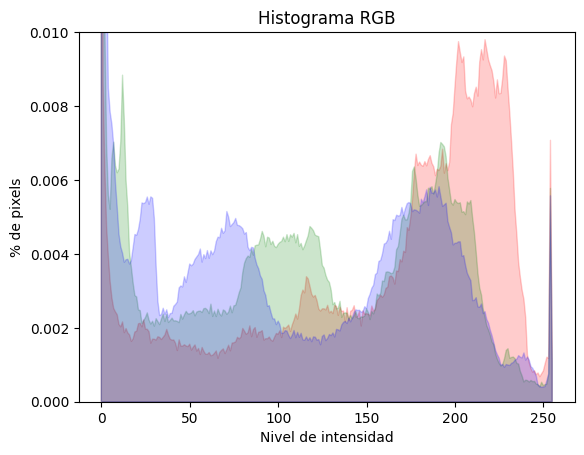

In [8]:
plt.figure()
plt.ylim(0, 0.01)
plt.title("Histograma RGB")
x = np.arange(256)
plt.xlabel("Nivel de intensidad")
plt.ylabel("% de pixels")
plt.fill_between(x, 0, histogram(im[:,:,0], normalize=True)[0], alpha=0.2, color='red')
plt.fill_between(x, 0, histogram(im[:,:,1], normalize=True)[0], alpha=0.2, color='green')
plt.fill_between(x, 0, histogram(im[:,:,2], normalize=True)[0], alpha=0.2, color='blue')
plt.show()

### Histograma acumulado

A continuación, usaremos la misma imagen y la función `skimage.exposure.cumulative_distribution`para mostrar el histograma acumulado.

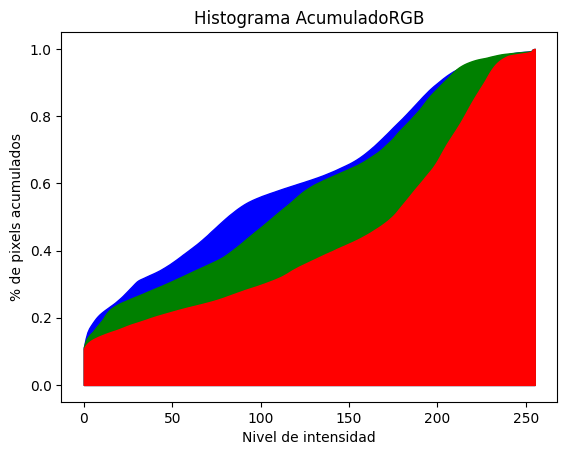

In [9]:
plt.figure()

plt.title("Histograma AcumuladoRGB")
x = np.arange(256)
plt.xlabel("Nivel de intensidad")
plt.ylabel("% de pixels acumulados")
plt.fill_between(x, 0, cumulative_distribution(im[:,:,2])[0],  color='blue')
plt.fill_between(x, 0, cumulative_distribution(im[:,:,1])[0],  color='green')
plt.fill_between(x, 0, cumulative_distribution(im[:,:,0])[0],  color='red')

plt.show()

### Ecualización de histograma

A continuación, vamos a trabajar con la ecualización del histograma. Leeremos una imagen de bajo contraste

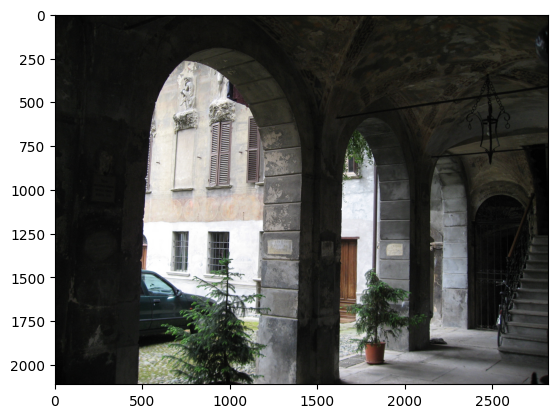

In [10]:
im = imread('http://www.maths.lth.se/matematiklth/personal/solem/downloads/AquaTermi_lowcontrast.JPG')/255
plt.imshow(im, cmap='gray', vmin=0, vmax=1)

Podemos verificar que la imagen es de bajo contraste observando el histograma (en este caso, solo del canal Rojo)

(0.0, 1.0)

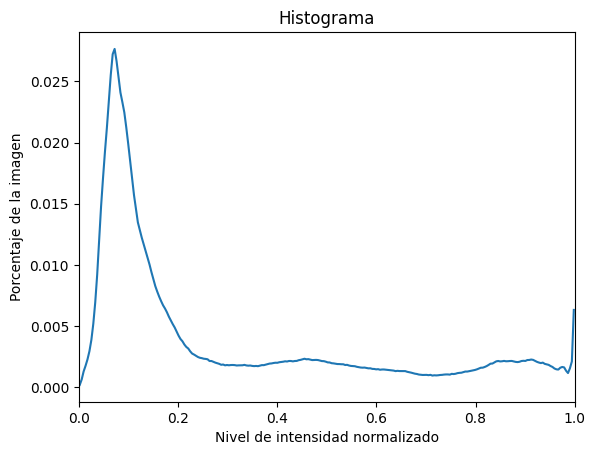

In [11]:
hist, bins = histogram(im[:,:,0], normalize=True)
plt.title("Histograma")
plt.plot(bins, hist)
plt.xlabel("Nivel de intensidad normalizado")
plt.ylabel("Porcentaje de la imagen")
plt.xlim(0, 1)

También podemos observar el histograma acumulado

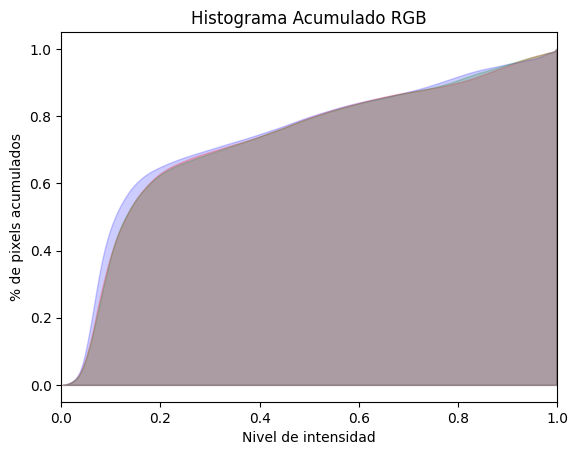

In [12]:
plt.figure()

plt.title("Histograma Acumulado RGB")
plt.xlabel("Nivel de intensidad")
plt.xlim(0,1)
plt.ylabel("% de pixels acumulados")
plt.fill_between(cumulative_distribution(im[:,:,2])[1], 0, cumulative_distribution(im[:,:,2])[0], alpha=0.2, color='blue')
plt.fill_between(cumulative_distribution(im[:,:,0])[1], 0, cumulative_distribution(im[:,:,0])[0], alpha=0.2, color='red')
plt.fill_between(cumulative_distribution(im[:,:,1])[1], 0, cumulative_distribution(im[:,:,1])[0], alpha=0.2, color='green')

plt.show()

Finalmente, podemos llamar a la función `skimage.exposure.equalize_hist` para ecualizar la imagen y a continuación se muestra

d:\Codes\image-processing\.env\Lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


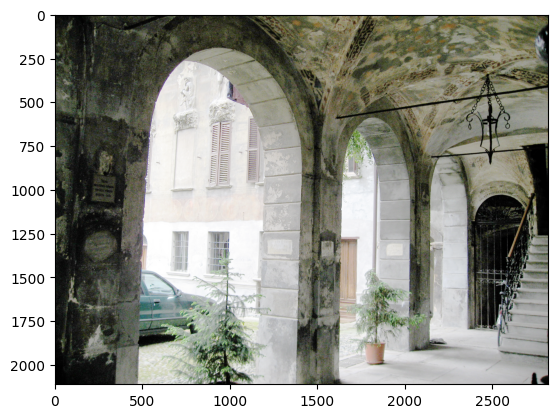

In [13]:
im_ecualizada = equalize_hist(im)
plt.imshow(im_ecualizada)

(0.0, 1.0)

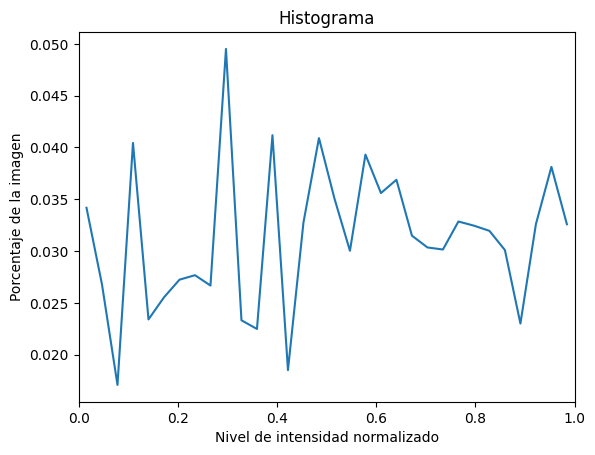

In [14]:
hist, bins = histogram(im_ecualizada[:,:,0], normalize=True, nbins=32)
plt.title("Histograma")
plt.plot(bins, hist)
plt.xlabel("Nivel de intensidad normalizado")
plt.ylabel("Porcentaje de la imagen")
plt.xlim(0, 1)

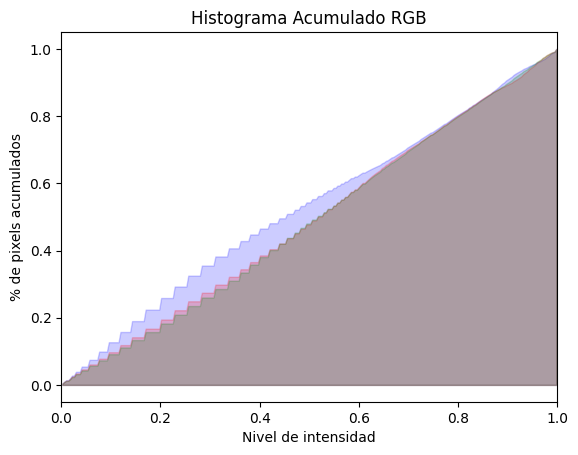

In [15]:
plt.figure()

plt.title("Histograma Acumulado RGB")
plt.xlabel("Nivel de intensidad")
plt.xlim(0,1)
plt.ylabel("% de pixels acumulados")
plt.fill_between(cumulative_distribution(im_ecualizada[:,:,2])[1], 0, cumulative_distribution(im_ecualizada[:,:,2])[0], alpha=0.2, color='blue')
plt.fill_between(cumulative_distribution(im_ecualizada[:,:,0])[1], 0, cumulative_distribution(im_ecualizada[:,:,0])[0], alpha=0.2, color='red')
plt.fill_between(cumulative_distribution(im_ecualizada[:,:,1])[1], 0, cumulative_distribution(im_ecualizada[:,:,1])[0], alpha=0.2, color='green')

plt.show()